## 분류 vs 회귀
분류 : Classification : 범주값(이산값)

회귀 : Regression : 숫자값(연속값)

# 단순 선형 회귀
 독립변수의 개수 = 1개 + 선형

## 1. 아버지와 아들의 키 - Galten

In [94]:
import pandas as pd
import numpy as np

In [96]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


## - 아버지와 아들의 키만 발췌하고 단위를 cm로 반환

In [97]:
df = df[df.Gender == 'M']
height = df[ ['Father','Height']].rename(columns = {'Height': 'Son'})
height.head()

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [99]:
height = height * 2.54
height.head()

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070


In [100]:
import matplotlib.pyplot as plt

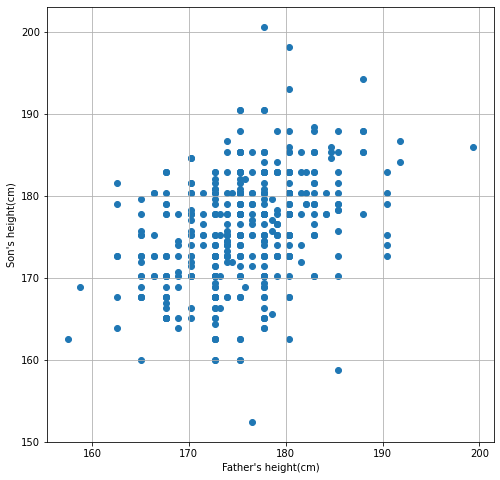

In [101]:
plt.figure(figsize =(8,8))
plt.scatter(height.Father, height.Son)
plt.xlabel("Father's height(cm)")
plt.ylabel("Son's height(cm)")
plt.grid()
plt.show()

## Numpy 최소 자승법을 이용해서 회귀선 구하기

In [102]:
A = np.vstack([height.Father, np.ones(len(height.Father))]).T
A[0]

array([199.39,   1.  ])

In [103]:
height.Father.shape

(465,)

In [104]:
height.Son.shape

(465,)

In [105]:
reg = np.linalg.lstsq(A,height.Son, rcond =None)
reg

(array([ 0.44774792, 97.17763701]),
 array([17556.59951549]),
 2,
 array([3.79064358e+03, 7.15847817e-01]))

In [106]:
# 기울기와 절편
m,c = reg[0] # [ 0.44774792, 97.17763701]

In [107]:
# 잔차제곱의 합(Residual Sum of Square )
rss = reg[1][0] # [17556.59951549]

In [109]:
m,c,rss

(0.44774791760302285, 97.1776370073939, 17556.599515494014)

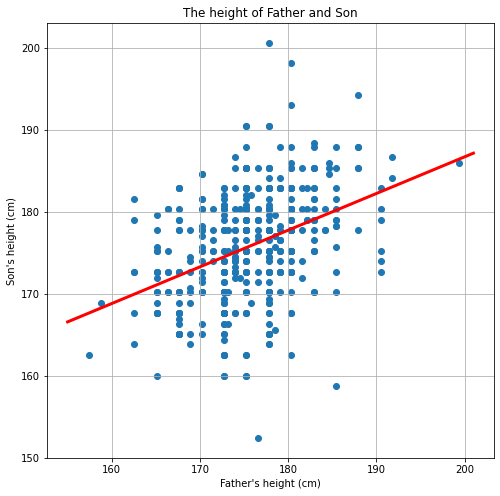

In [110]:
plt.figure(figsize=(8,8))
plt.scatter(height.Father, height.Son)
plt.plot([155, 201], [m*155+c, m*201+c], 'r', lw=3) #red color: 'r' , line width : lw
plt.title('The height of Father and Son')
plt.xlabel("Father's height (cm)"); plt.ylabel("Son's height (cm)")
plt.grid(); plt.show()

## - Scikit-Learn

In [68]:
from sklearn.linear_model import LinearRegression

In [111]:
# fit(X_train, y_train) # X_train을 2차원으로, y_train을 1차원으로 만들어 주어야함

height.Father.values.shape #X_traibn인 height.Father, 이를 2차원으로 만들어 주어야함! 

(465,)

In [112]:
# SHAPE 맞춰주기
X = height.Father.values.reshape(-1,1) # -1: 자동으로 element 개수를 맞춤
y = height.Son.values
#확인
X.shape, y.shape  

((465, 1), (465,))

In [113]:
lr = LinearRegression() #선형회귀

# lr.fit(height.Father.values, height.Son.values) #ValueError: Expected 2D array, got 1D array instead:
# 차원을 맞춰주지 않았기 때문에 오류 발생함. -> 차원을 맞춘 X, y를 이용하면 오류 발생 x
lr.fit(X,y)

LinearRegression()

In [114]:
lr.coef_, lr.intercept_

(array([0.44774792]), 97.17763700739346)

 ### 회귀식
 y = wx + b # w: weight, b:bias

 y = w1x1 + w2x2 + b

In [115]:
weight, bias = lr.coef_, lr.intercept_
rss = lr._residues
weight[0], bias, rss

(0.4477479176030255, 97.17763700739346, 17556.59951549399)

## 모델의 성능 
R-squared 결정계수

0~1 사이 값을 가지며 1에 가까울 수록 설명력이 높다.